In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import matplotlib as mpl

In [2]:
#reading_data
salary_dataset = pd.read_csv("Salary_dataset.csv", index_col = 0)

# indpendant variable (predictor) 
X = salary_dataset.iloc[:,:-1].values
# depndant variable (target)
Y = salary_dataset.iloc[:,1].values

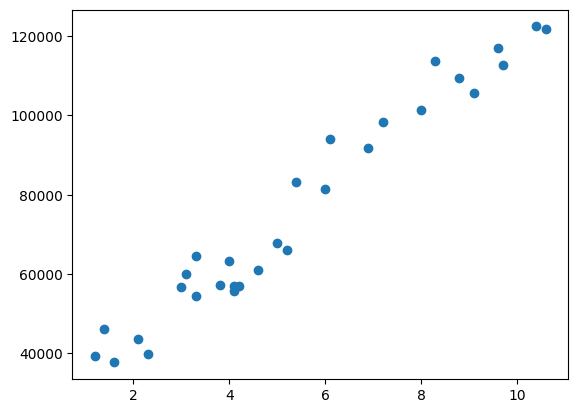

In [3]:
# plotting data
# we can see we might the best fit is a line thus implementing linear regression
fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [4]:
# cost function of linear regression is the mean squared error function
# f(x) the function that defines the relationship between indpendant and depandant variables
# w is feature weight 
# b is intercept
# m  is the size of training examples
# y  is the target variable
# y^ is the predicted values ( f_x ) 

class LinearRegression():
    def __init__(self, learning_rate, iterations):
        self.iterations    = iterations 
        self.learning_rate = learning_rate

    def fit(self, X,Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n) 
        self.b = 0
        self.X = X
        self.Y = Y
        self.cost_func_values = []
        self.w_value = []
        for i in range(self.iterations):
            total_cost = self.cost_function()
            #if i == 0:
            #    print(f'iteration {i}: when w is {self.W[0]} and b is {self.b} cost_function = {total_cost}')
            #else: 
            #    print(f'iteration {i}: when w is {self.W[0]} and b is {self.b} cost_function = {total_cost} with decrease of {self.cost_func_values[i-1]-total_cost}')
            self.cost_func_values.append(total_cost)
            self.w_value.append(self.W[0])
            self.update_w_b()
        return self

    def predict_function(self, X): 
         return X.dot(self.W) + self.b
        
    def update_w_b(self):
        predict = self.predict_function(self.X)
        #calculate gradients
        dw = (2/self.m)*(self.X.T).dot(predict - self.Y) 
        db = (2/self.m)     *    sum(predict - self.Y) 
        #update values
        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        return self     
    
    def cost_function(self):
        # cost function is calculated over the entire dataset 
        total_cost = sum((self.predict_function(X) - Y)**2)/self.m
        return total_cost


In [5]:
model = LinearRegression(iterations = 1000, learning_rate = 0.01)
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 ) 
#start training
model.fit(X_train, Y_train) 
Y_pred = model.predict_function(X_test)
print('predict values', np.round(Y_pred,2))
print('real values'   , Y_test)
print('trained W', round(model.W[0],2))
print('trained b', round(model.b, 2))
from sklearn.metrics import r2_score
print('accuracy' , r2_score(Y_test, Y_pred))

predict values [ 40574.85 123328.63  65024.83  63144.07 115805.56 108282.49 116745.94
  64084.45  76309.44 100759.42]
real values [ 37732. 122392.  57082.  63219. 116970. 109432. 112636.  55795.  83089.
 101303.]
trained W 9403.84
trained b 25528.71
accuracy 0.975352713063798


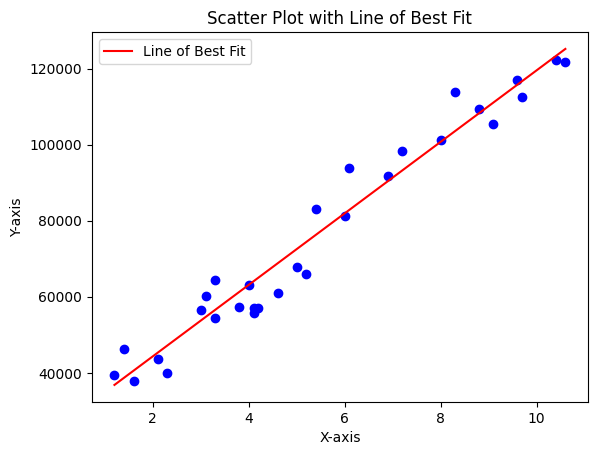

In [6]:
## plot the line
yfit = model.W[0]*X+model.b
# Plot the scatter plot and line of best fit
plt.scatter(X, Y, color='blue')
plt.plot(X, yfit, color='red', label='Line of Best Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()

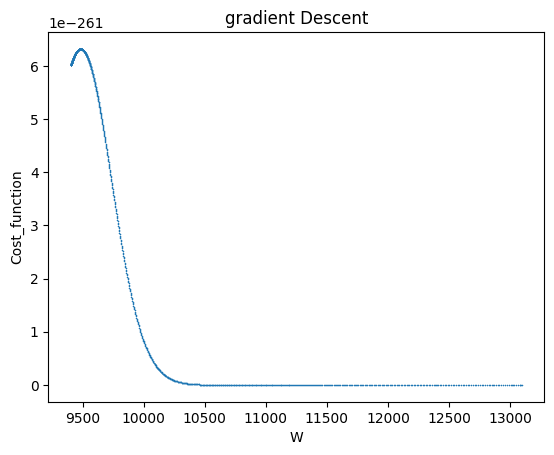

47130645.273206


In [7]:
cost= [(i*10)**-30 for i in model.cost_func_values[2:]]
W = model.w_value[2:]
mpl.rcParams['lines.markersize'] = 10**-14
plt.scatter(W,cost)
plt.xlabel('W')
plt.ylabel('Cost_function')
plt.title('gradient Descent')
plt.show()
print(min(model.cost_func_values))

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9569566641435086

In [9]:
Y_pred = reg.predict(X_test)
print('predict values', np.round(Y_pred,2))
print('real values'   , Y_test)
print('accuracy' , r2_score(Y_test, Y_pred))
print('W', round(reg.coef_[0],2))
print('b', round(reg.intercept_,2))

predict values [ 39968.14 123127.81  64538.05  62648.05 115567.84 108007.87 116512.84
  63593.05  75878.   100447.9 ]
real values [ 37732. 122392.  57082.  63219. 116970. 109432. 112636.  55795.  83089.
 101303.]
accuracy 0.9768525143048814
W 9449.96
b 24848.2


In [10]:
9483.615804680137

9483.615804680137